In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns;
import statsmodels.api as sm
import random
from scipy import stats
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import pickle
import sys
sys.setrecursionlimit(10000)

 <font color='red'>  Read the dataset  'pml_eval.csv' -  </font>

In [ ]:
data = pd.read_csv('set1data.csv')
data.drop('NaN', axis=1, inplace=True)
data

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,NaN,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,NaN,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,F,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,S,Father,5,4,5,8,No,Bad,Above-7,L
476,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,F,Father,50,77,14,28,No,Bad,Under-7,M
477,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,S,Father,55,74,25,29,No,Bad,Under-7,M
478,F,Jordan,Jordan,MiddleSchool,G-08,A,History,F,Father,30,17,14,57,No,Bad,Above-7,L


 <font color='Magenta'>DataSet Description </font>



1 Gender - student's gender (nominal: 'Male' or 'Female’)

2 Nationality- student's nationality (nominal:’ Kuwait’,’ Lebanon’,’ Egypt’,’ SaudiArabia’,’ USA’,’ Jordan’,’ Venezuela’,’ Iran’,’ Tunis’,’ Morocco’,’ Syria’,’ Palestine’,’ Iraq’,’ Lybia’)

3 Place of birth- student's Place of birth (nominal:’ Kuwait’,’ Lebanon’,’ Egypt’,’ SaudiArabia’,’ USA’,’ Jordan’,’ Venezuela’,’ Iran’,’ Tunis’,’ Morocco’,’ Syria’,’ Palestine’,’ Iraq’,’ Lybia’)

4 Educational Stages- educational level student belongs (nominal: ‘lowerlevel’,’MiddleSchool’,’HighSchool’)

5 Grade Levels- grade student belongs (nominal: ‘G-01’, ‘G-02’, ‘G-03’, ‘G-04’, ‘G-05’, ‘G-06’, ‘G-07’, ‘G-08’, ‘G-09’, ‘G-10’, ‘G-11’, ‘G-12 ‘)

6 Section ID- classroom student belongs (nominal:’A’,’B’,’C’)

7 Topic- course topic (nominal:’ English’,’ Spanish’, ‘French’,’ Arabic’,’ IT’,’ Math’,’ Chemistry’, ‘Biology’, ‘Science’,’ History’,’ Quran’,’ Geology’)

8 Semester- school year semester (nominal:’ First’,’ Second’)

9 Parent responsible for student (nominal:’mom’,’father’)

10 Raised hand- how many times the student raises his/her hand on classroom (numeric:0-100)

11- Visited resources- how many times the student visits a course content(numeric:0-100)

12 Viewing announcements-how many times the student checks the new announcements(numeric:0-100)

13 Discussion groups- how many times the student participate on discussion groups (numeric:0-100)

14 Parent Answering Survey- parent answered the surveys which are provided from school or not (nominal:’Yes’,’No’)

15 Parent School Satisfaction- the Degree of parent satisfaction from school(nominal:’Yes’,’No’)

16 Student Absence Days-the number of absence days for each student (nominal: above-7, under-7)

#Questions

<font color='red'> Ques.1 Find any missing values and do the visulaization of the missing values.  For example in 'raisedhands' if any missing values are there do the plotting on total rows Vs. how many rows have an issue. (2 Marks)</font>

In [ ]:
for i in data.columns:
  print(i, ":", data[i].isna().sum())


gender : 0
NationalITy : 0
PlaceofBirth : 0
StageID : 0
GradeID : 0
SectionID : 0
Topic : 0
Semester : 0
Relation : 0
raisedhands : 26
VisITedResources : 0
AnnouncementsView : 24
Discussion : 0
ParentAnsweringSurvey : 0
ParentschoolSatisfaction : 0
StudentAbsenceDays : 0
Class : 0
Grades : 0


<font color='red'> Ques.2 FIll the missing value (Mean- raisedhands ; Mode - AnnouncementsView) (2 Marks)

In [ ]:
data['raisedhands'].fillna(data['raisedhands'].mean, inplace=True)
data['AnnouncementsView'].fillna(data['AnnouncementsView'].mode, inplace=True)
for i in data.columns:
  print(i, ":", data[i].isna().sum())

gender : 0
NationalITy : 0
PlaceofBirth : 0
StageID : 0
GradeID : 0
SectionID : 0
Topic : 0
Semester : 0
Relation : 0
raisedhands : 0
VisITedResources : 0
AnnouncementsView : 0
Discussion : 0
ParentAnsweringSurvey : 0
ParentschoolSatisfaction : 0
StudentAbsenceDays : 0
Class : 0
AbsentDays : 0


<font color='red'>Ques.3 GradeID ranges from G-01 to G-12 [Ex.G-02, G-03, G-11 ] . Assume that the grades also ranges from 1 to 12. Convert the GradeIDs into Grades as per our assumption. ( 2 Marks)

In [ ]:
data['Grades']=data['GradeID'].apply(lambda x: int(x[-2:]))
data.head(5)

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class,Grades
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,NaN,16,2,20,Yes,Good,Under-7,M,4
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M,4
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,NaN,30,No,Bad,Above-7,L,4
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L,4
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M,4


<font color='red'>Ques.4 If the grade/class(H,M and L) is high then the absent days are low. Verify the statemet by using visualization   (2 Marks)

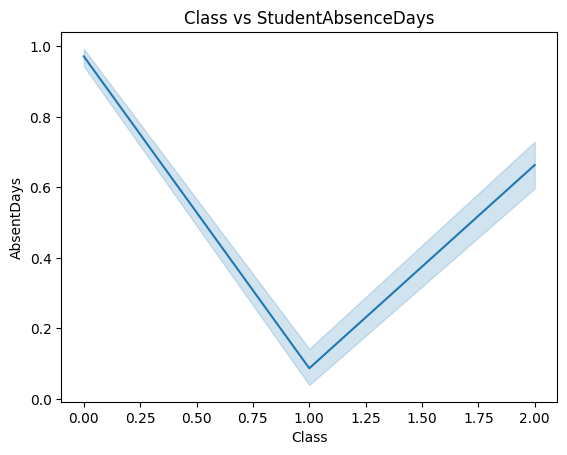

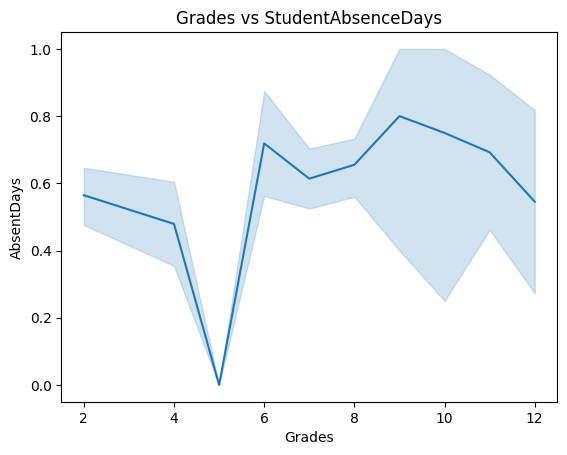

In [ ]:
le = LabelEncoder()
data['AbsentDays'] = le.fit_transform(data['StudentAbsenceDays'])
data['Class'] = le.fit_transform(data['Class'])

sns.lineplot(x='Class', y='AbsentDays', data=data)
plt.title('Class vs StudentAbsenceDays')
plt.show()

sns.lineplot(x='Grades', y='AbsentDays', data=data)
plt.title('Grades vs StudentAbsenceDays')
plt.show()

<font color='red'>Ques.5 After converting the GradeIDs in to Grades - Draw the histogram then apply z Score => again plot histogram ( 2 Marks)

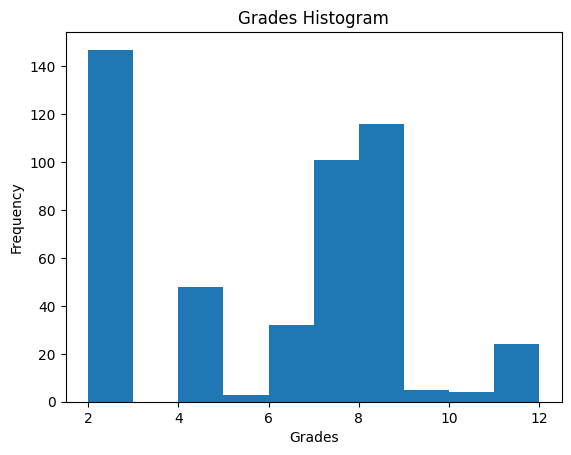

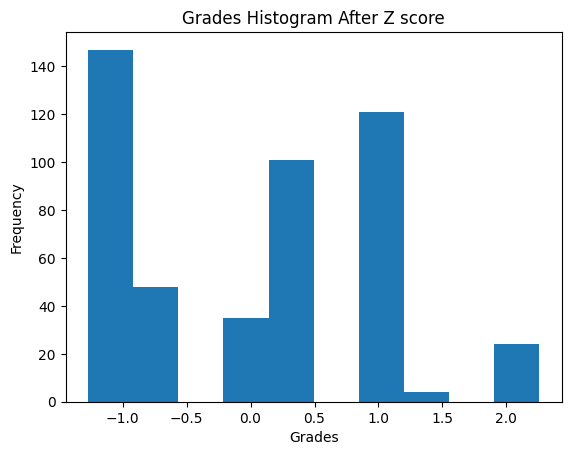

In [ ]:
plt.hist(data['Grades'], bins=10)
plt.title('Grades Histogram')
plt.xlabel('Grades')
plt.ylabel('Frequency')
plt.show()

# Apply z-score normalization to 'Grades' column
data['Grades'] = stats.zscore(data['Grades'])


# Draw histogram for 'Grades' column after z-score normalization
plt.hist(data['Grades'], bins=10)
plt.title('Grades Histogram After Z score')
plt.xlabel('Grades')
plt.ylabel('Frequency')
plt.show()

<font color='red'>Ques.6 After pre processing plot heat map between each variable ( 2 Marks)

<ipython-input-111-d89f1205df99>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


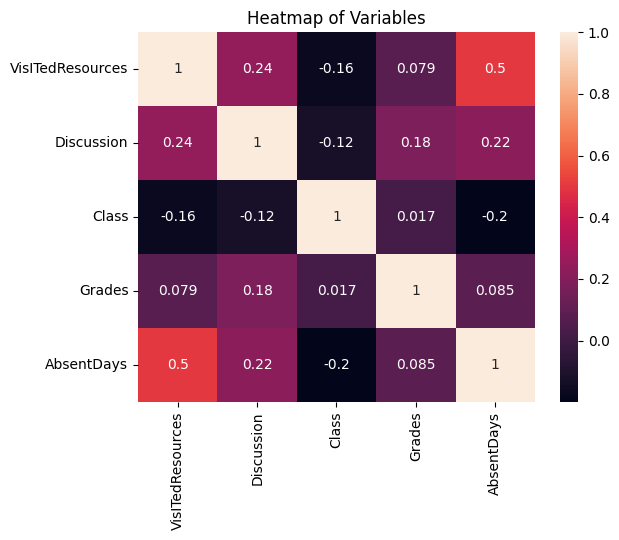

In [ ]:
corr_matrix = data.corr()

sns.heatmap(corr_matrix, annot=True)
plt.title('Heatmap of Variables')
plt.show()

<font color='red'>Ques.7 Find the problem statement from the given data set and build the model (6 Marks)

In [ ]:
le = LabelEncoder()
for i in data.columns:
  if i not in ['raisedhands',	'VisITedResources',	'AnnouncementsView',	'Discussion']:
    data[i] = le.fit_transform(data[i])


X = data.drop('Class', axis=1).copy()
X = X.drop('GradeID', axis=1).copy()
X = X.drop('raisedhands', axis=1).copy()
X = X.drop('AnnouncementsView', axis=1).copy()
y = data['Class'].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.2, shuffle=True, random_state=1)

scaler = MinMaxScaler()
scaler.fit(X_train)
train_x=scaler.transform(X_train)

model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

<font color='red'>Ques.8 Display the performance metrics based on your problem statement (2 Marks)

In [ ]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.5052083333333334
